In [81]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import numpy as np

boston = load_boston()
X = boston.data
y = boston.target

print(boston.DESCR)
print("-"*80)
print(X[0])
print(X.shape)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [82]:
X.shape

(506, 13)

In [83]:
y.shape

(506,)

In [84]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [85]:
X[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [86]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

### Least squares projection
- Assume that we have a problem like:

    Ac = b

    (Data Matrix)(Coefficients) = (labels (or target variable))
    

- We want to find the solution that minimizes the squared error:
    
    min $||Ac - b||^2$
    

- If A is invertible

    $c = A^{-1}b$
    
    
- However, A is not always invertible, to solve this problem we should find an invertible form:
    
    $A^TAc = A^Tb$
    
    $c = (A^TA)^{-1}A^Tb$
    
    
- The problem becomes

    $Ac = A(A^TA)^{-1}A^Tb$ where 
    
    $A(A^TA)^{-1}A^T$ is the projection matrix onto the column space of A


In [87]:
c = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
c

array([-1.28297552e-01,  5.36956641e-02, -2.66902863e-02,  2.88353168e+00,
       -3.36462948e-01,  5.57559842e+00, -4.95200852e-03, -9.81819573e-01,
        2.17650101e-01, -9.76367973e-03, -3.65138586e-01,  1.79995978e-02,
       -4.92002550e-01])

In [88]:
# prediction on the test data

ac_pred = X_test @ c
ac_pred[:5]

array([38.68119658, 32.1467427 , 26.17783256,  4.95514299, 37.40579142])

In [89]:
# Least squares regression with built-in functions
theta,residuals,rank,s = np.linalg.lstsq(X_train, y_train)
theta # The solution of least squares problem (coefficients)

C:\Users\iocak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([-1.28297552e-01,  5.36956641e-02, -2.66902863e-02,  2.88353168e+00,
       -3.36462948e-01,  5.57559842e+00, -4.95200852e-03, -9.81819573e-01,
        2.17650101e-01, -9.76367973e-03, -3.65138586e-01,  1.79995978e-02,
       -4.92002550e-01])

In [90]:
print(rank) # Rank of the data matrix (X_train)
print(s) # Singular values of X_train

13
[1.12241678e+04 3.05009381e+03 5.82555255e+02 3.59947484e+02
 1.46205695e+02 1.05925337e+02 7.88931198e+01 6.87549248e+01
 5.71271679e+01 2.13504265e+01 1.63847821e+01 4.90515834e+00
 1.25486068e+00]


In [65]:
# Make predictions on the test data
predictions = np.dot(X_test, theta)
print(predictions[:5])
# Let's see the output on training data as well, to see the training error
y_train_pred = np.dot(X_train, theta)

[38.68119658 32.1467427  26.17783256  4.95514299 37.40579142]


In [66]:
# MSE calculation
from sklearn.metrics import mean_squared_error

print (mean_squared_error(y_test, predictions))
print (mean_squared_error(y_train, y_train_pred))

22.756666526455827
24.961120552236665


In [67]:
# MAE calculation
from sklearn.metrics import mean_absolute_error

print (mean_absolute_error(y_test, predictions))
print (mean_absolute_error(y_train, y_train_pred))

3.254345024608057
3.3661465447118197


In [68]:
# R2 Score calculation
from sklearn.metrics import r2_score

print (r2_score(y_train, y_train_pred))
print (r2_score(y_test, predictions))

0.709422266854064
0.7093429293628318


## Adding one's column! (bias term or intercept)

In [91]:
X = np.c_[X, np.ones(len(X))]

# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Least squares regression
theta,residuals,rank,s = np.linalg.lstsq(X_train, y_train)

# Make predictions on the test data
predictions = np.dot(X_test, theta)
# Let's see the output on training data as well, to see the training error
y_true_pred = np.dot(X_train, theta)

# MSE calculation
print (mean_squared_error(y_test, predictions))
print (mean_squared_error(y_train, y_true_pred))

# MAE calculation
print (mean_absolute_error(y_test, predictions))
print (mean_absolute_error(y_train, y_true_pred))

# R2 Score calculation
print (r2_score(y_train, y_true_pred))
print (r2_score(y_test, predictions))

20.86929218377084
22.477090408387635
3.2132704958423846
3.3500095196484514
0.7383393920590519
0.7334492147453072


C:\Users\iocak\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


In [102]:
## Remove bias term from the data matrix, go back to original
X_train = X_train[:, :13]
X_test = X_test[:, :13]

In [104]:
## Same implementation with sklearn

# train
lin_reg = LinearRegression() #intercept is true by default
lin_reg.fit(X_train, y_train)

# predict
pred_sklearn = lin_reg.predict(X_test)

# calculate r2
print (r2_score(y_test, pred_sklearn))

0.733449214745311


## Lasso Model Selection - AIC, BIC

In [117]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

#### LassoLarsIC: least angle regression with BIC/AIC criterion
#### Bayesian information criterion (BIC) = Schwarz information criterion (SIC)

C:\Users\iocak\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


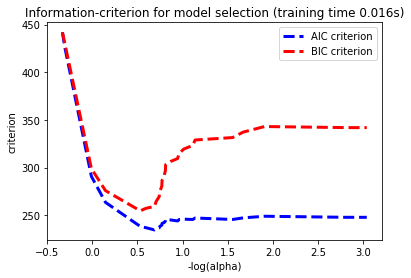

In [118]:
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_

def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)
plt.show()